In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

device = 'cuda:0'

/tmp/ipykernel_11419/634665442.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pdf_x = np.random.multivariate_normal(np.zeros(2), cov_mat, n_samples)


Text(0.5, 1.0, 'real data distribution')

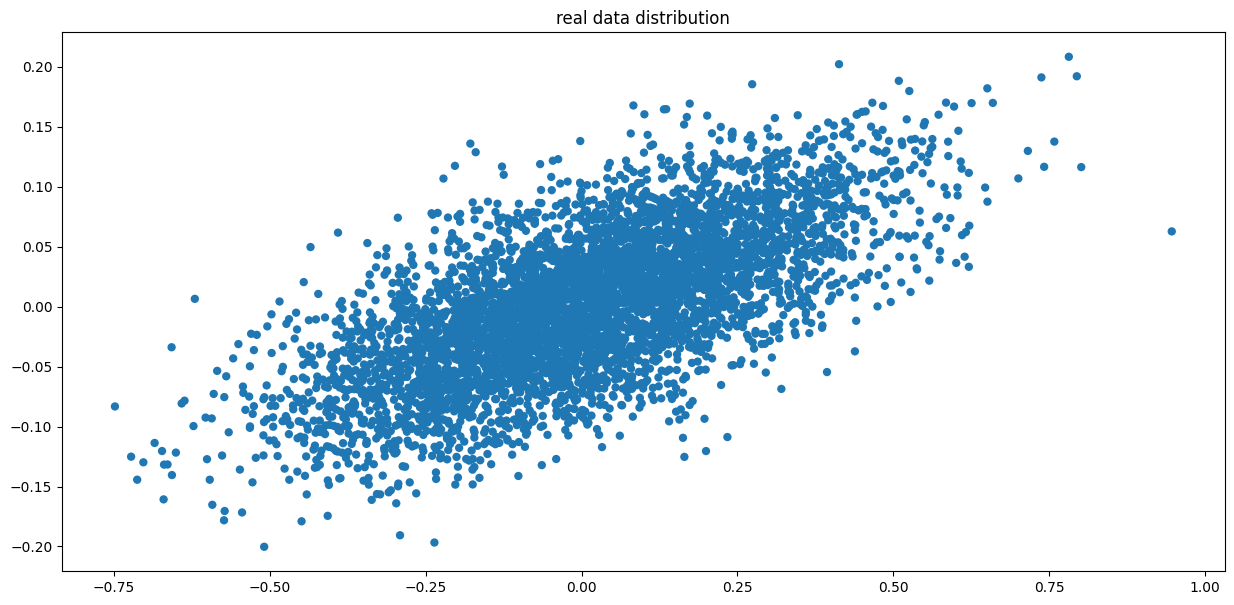

In [9]:
# create n_samples sampled from 2D N(0, 2.5)
n_samples = 5000

cov_mat = 0.01 * np.eye(2) + [[0., 0.0], [0.05, 0.]]

pdf_x = np.random.multivariate_normal(np.zeros(2), cov_mat, n_samples)
fig, ax = plt.subplots(figsize=(15, 7))
# print "pdf shape: ", pdf_x.shape
ax.scatter(pdf_x[:, 0], pdf_x[:, 1], edgecolor='none')
ax.set_title('real data distribution')

In [16]:
# create n_samples sampled from 2D N(0, 2.5)
# Hyperparameters
latent_dim = 2
hidden_dim = 128
batch_size = 256
num_epochs = 10000
lr = 1e-4
critic_iterations = 5
weight_clip = 0.01
viz_every = 500

# Prepare the dataset
dataloader = DataLoader(TensorDataset(torch.tensor(pdf_x).to(device)), batch_size=batch_size, shuffle=True)

# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, z):
        return self.model(z)

# Define the Critic (WGAN uses a critic instead of a discriminator)
class Critic(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Critic, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize models and optimizers
generator = Generator(latent_dim, hidden_dim, 2).to(device)
critic = Critic(2, hidden_dim).to(device)

optimizer_g = optim.RMSprop(generator.parameters(), lr=lr)
optimizer_c = optim.RMSprop(critic.parameters(), lr=lr)

  5%|▍         | 499/10000 [03:52<1:13:02,  2.17it/s]

Epoch 500/10000, D_loss: -0.0000, G_loss: -0.0000


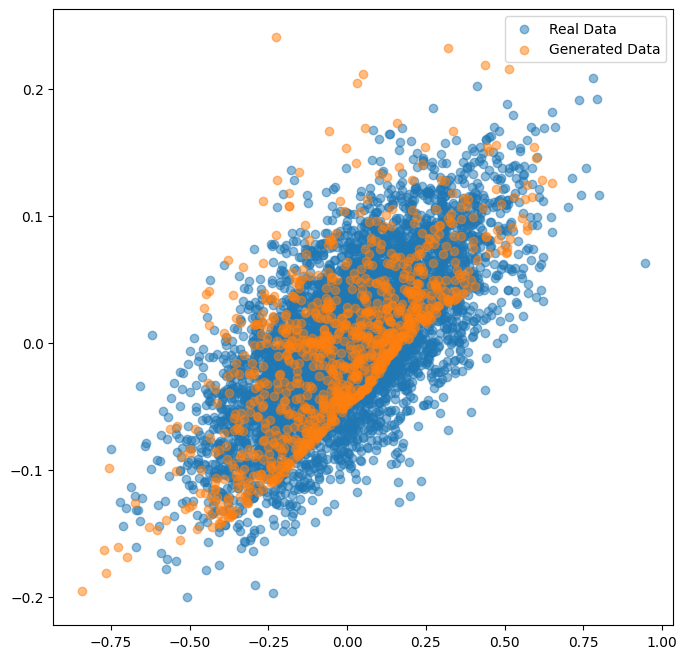

 10%|▉         | 999/10000 [07:53<1:13:50,  2.03it/s]

Epoch 1000/10000, D_loss: 0.0000, G_loss: 0.0000


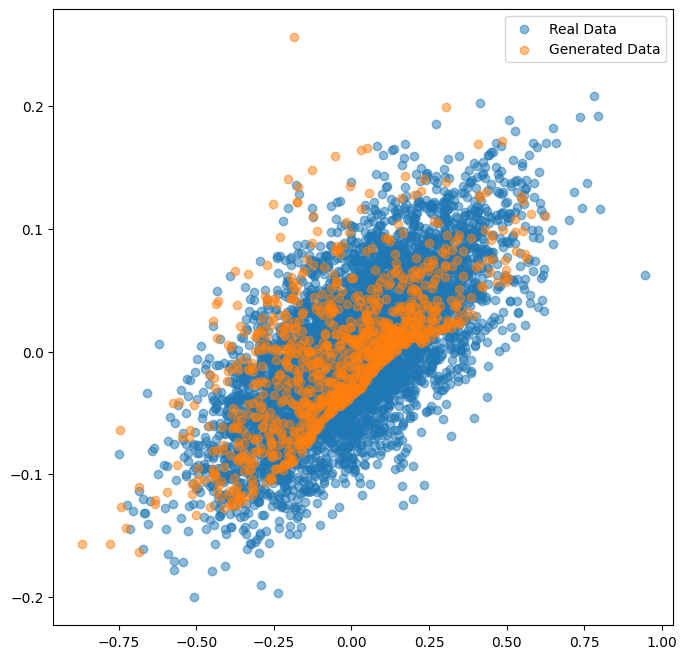

 15%|█▍        | 1499/10000 [11:48<1:06:21,  2.14it/s]

Epoch 1500/10000, D_loss: -0.0000, G_loss: -0.0007


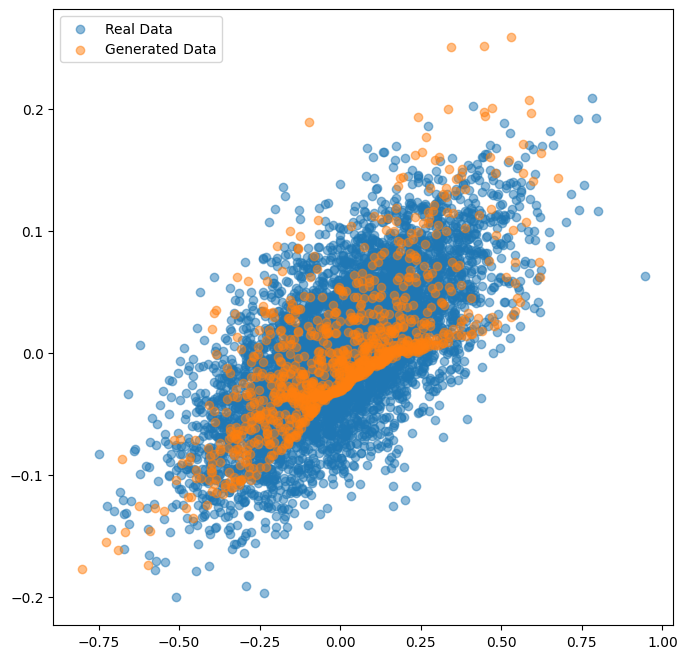

 20%|█▉        | 1999/10000 [15:42<1:03:56,  2.09it/s]

Epoch 2000/10000, D_loss: -0.0000, G_loss: 0.0001


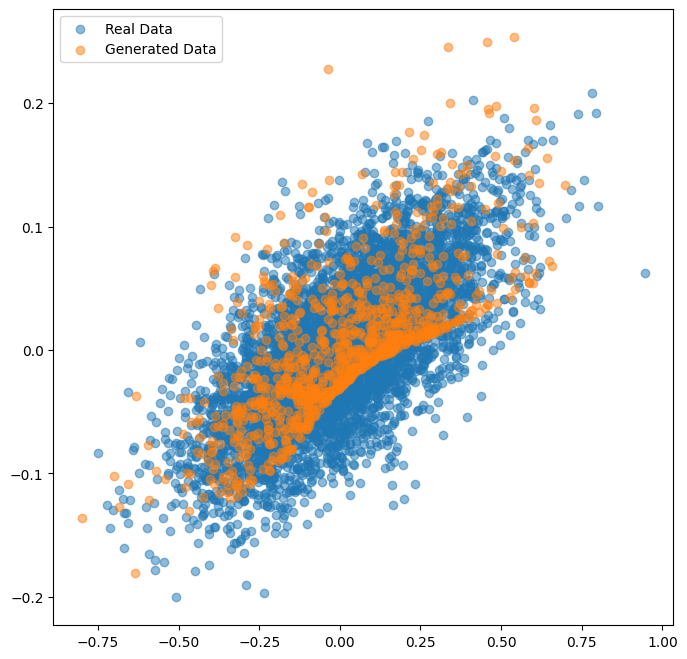

 25%|██▍       | 2499/10000 [19:36<57:59,  2.16it/s]  

Epoch 2500/10000, D_loss: -0.0000, G_loss: -0.0003


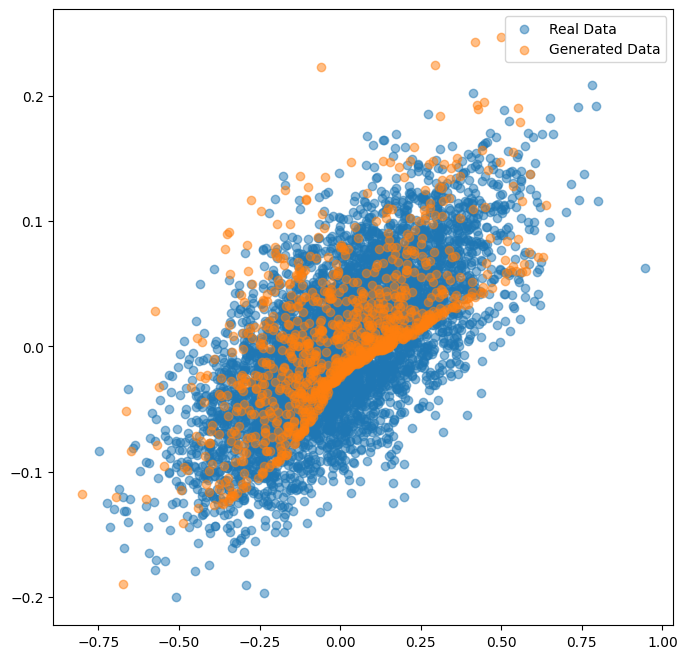

 30%|██▉       | 2999/10000 [23:30<53:58,  2.16it/s]  

Epoch 3000/10000, D_loss: -0.0000, G_loss: -0.0002


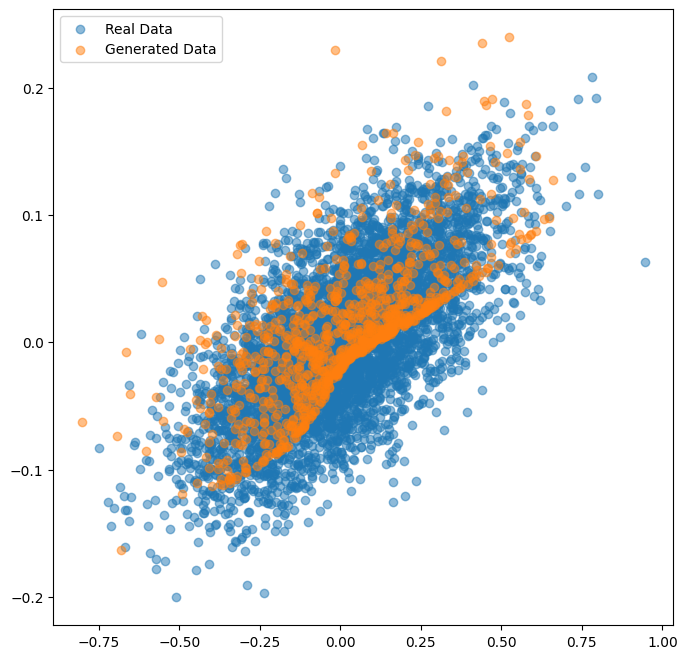

 35%|███▍      | 3499/10000 [27:21<49:21,  2.19it/s]  

Epoch 3500/10000, D_loss: -0.0000, G_loss: -0.0005


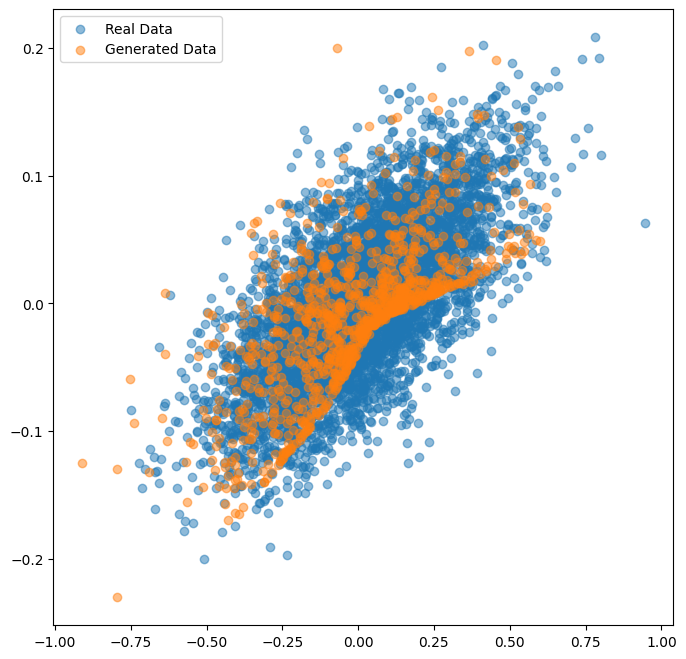

 40%|███▉      | 3999/10000 [31:15<45:58,  2.18it/s]

Epoch 4000/10000, D_loss: -0.0000, G_loss: -0.0002


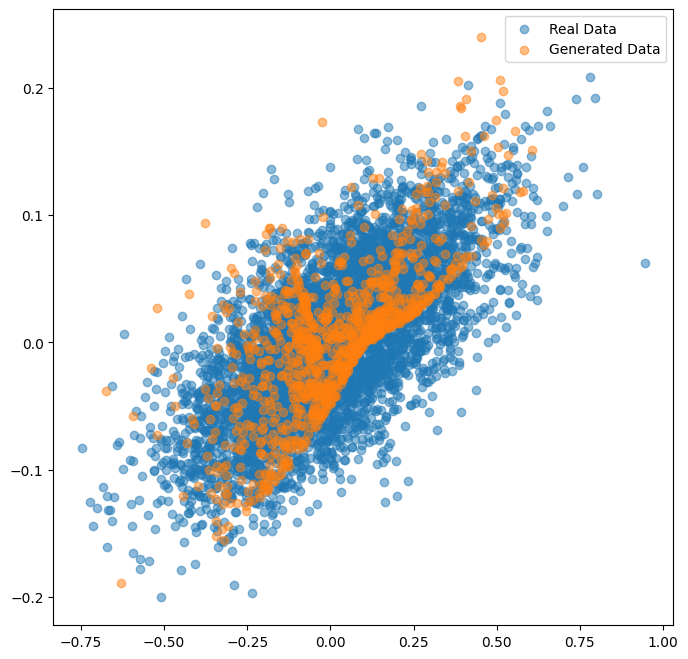

 45%|████▍     | 4499/10000 [35:04<45:02,  2.04it/s]

Epoch 4500/10000, D_loss: -0.0000, G_loss: -0.0008


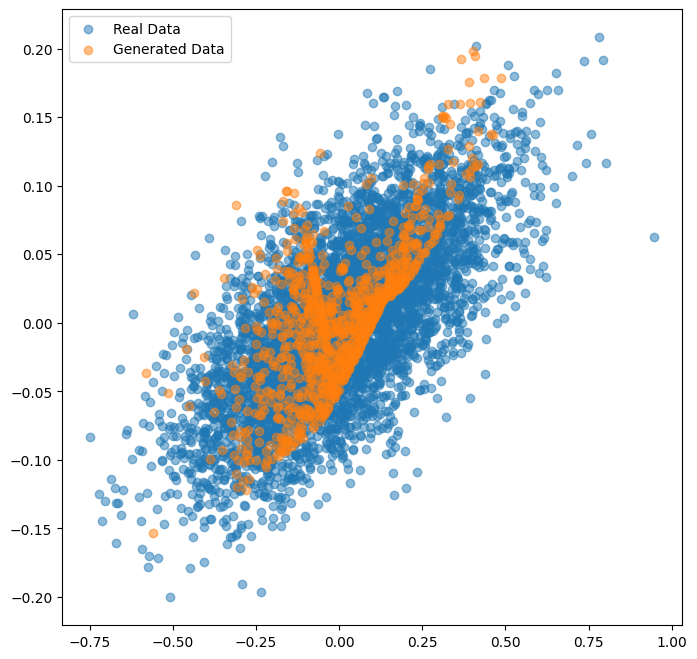

 50%|████▉     | 4999/10000 [38:58<38:37,  2.16it/s]

Epoch 5000/10000, D_loss: 0.0000, G_loss: -0.0005


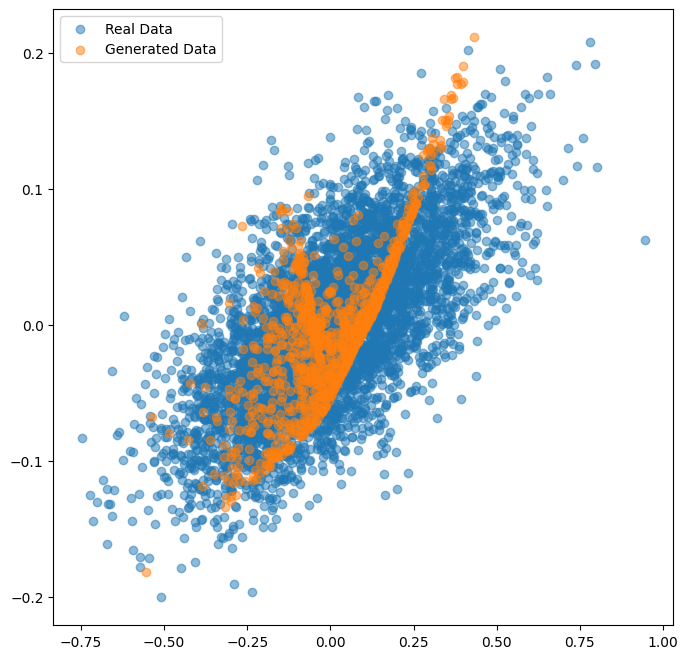

 55%|█████▍    | 5499/10000 [42:49<36:42,  2.04it/s]

Epoch 5500/10000, D_loss: 0.0000, G_loss: -0.0005


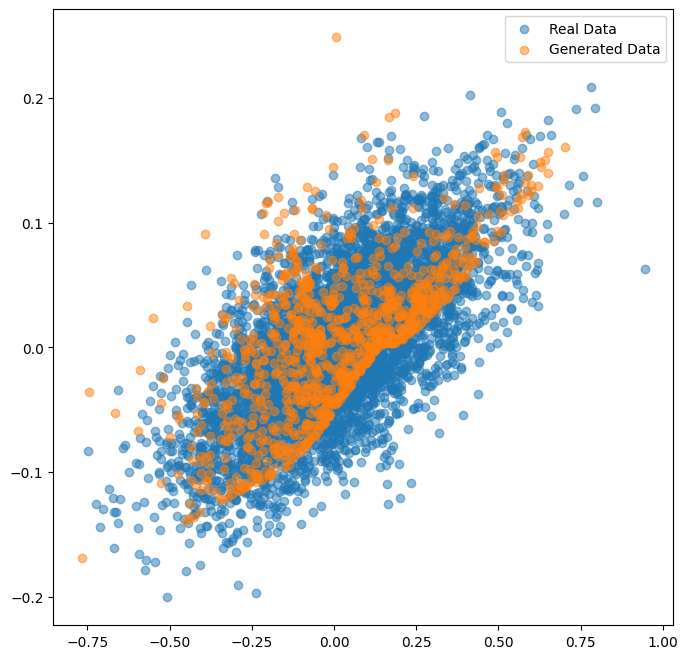

 60%|█████▉    | 5999/10000 [46:42<31:18,  2.13it/s]

Epoch 6000/10000, D_loss: 0.0000, G_loss: -0.0004


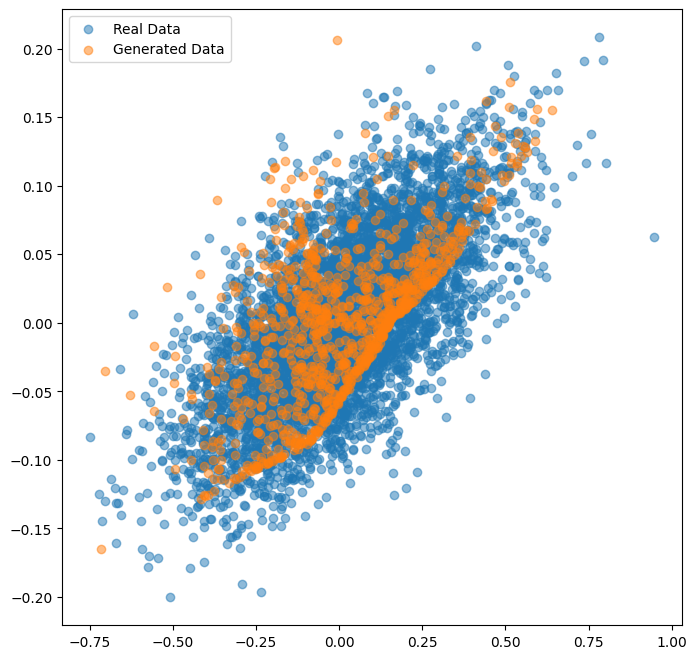

 65%|██████▍   | 6499/10000 [50:34<26:50,  2.17it/s]

Epoch 6500/10000, D_loss: 0.0000, G_loss: -0.0005


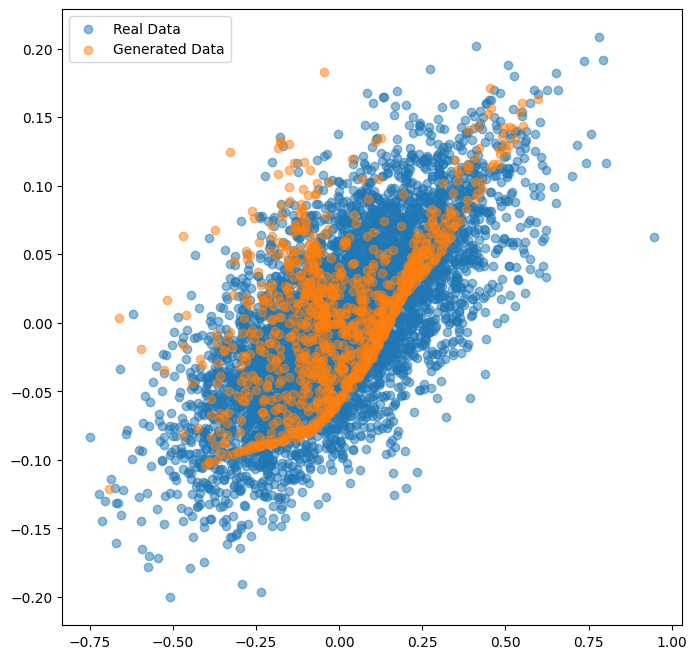

 70%|██████▉   | 6999/10000 [54:28<22:17,  2.24it/s]

Epoch 7000/10000, D_loss: -0.0000, G_loss: -0.0002


 75%|███████▍  | 7499/10000 [58:22<17:09,  2.43it/s]

Epoch 7500/10000, D_loss: -0.0000, G_loss: -0.0004


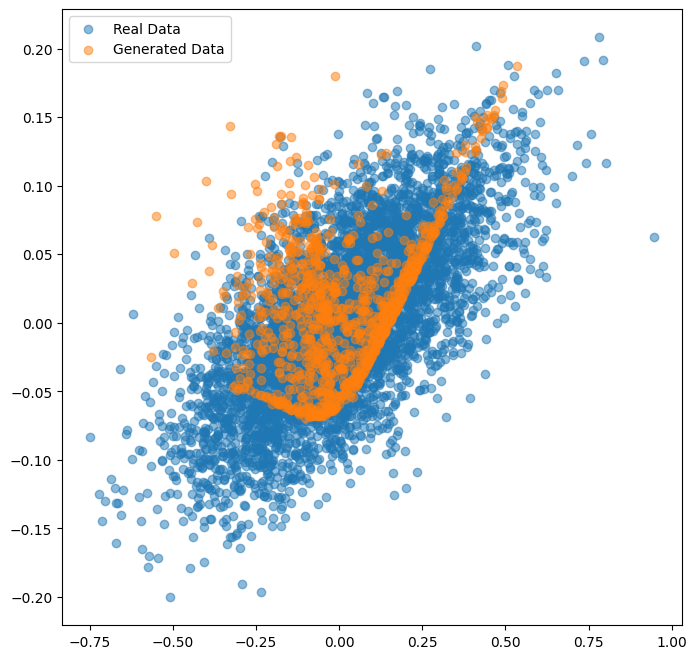

 80%|███████▉  | 7999/10000 [1:02:16<16:04,  2.07it/s]

Epoch 8000/10000, D_loss: -0.0000, G_loss: -0.0001


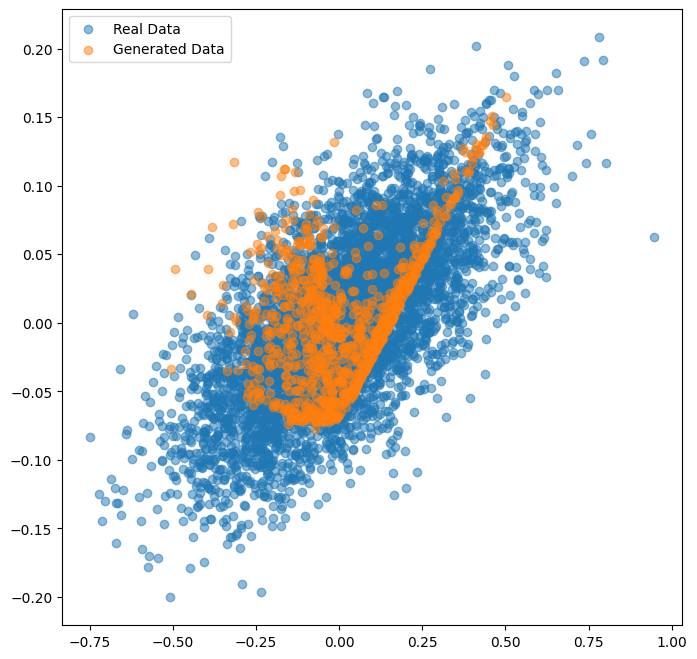

 85%|████████▍ | 8499/10000 [1:06:08<12:15,  2.04it/s]

Epoch 8500/10000, D_loss: 0.0000, G_loss: -0.0005


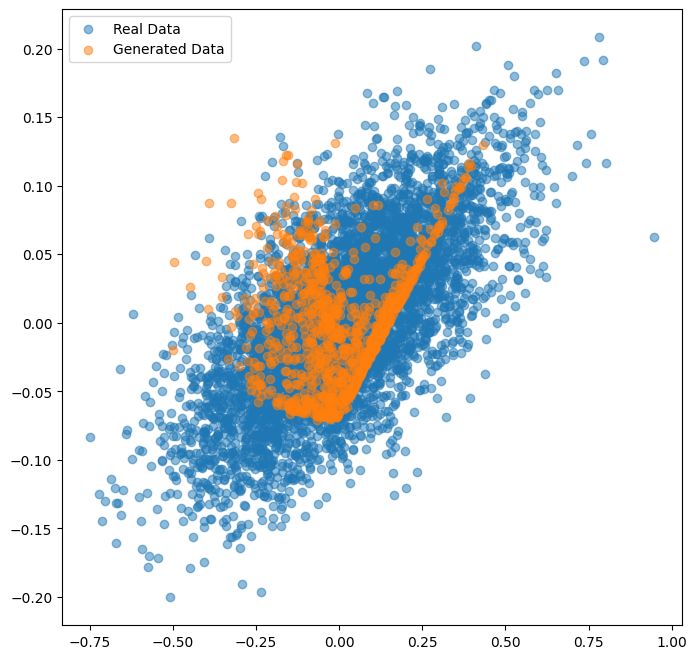

 90%|████████▉ | 8999/10000 [1:10:12<07:49,  2.13it/s]

Epoch 9000/10000, D_loss: 0.0000, G_loss: -0.0008


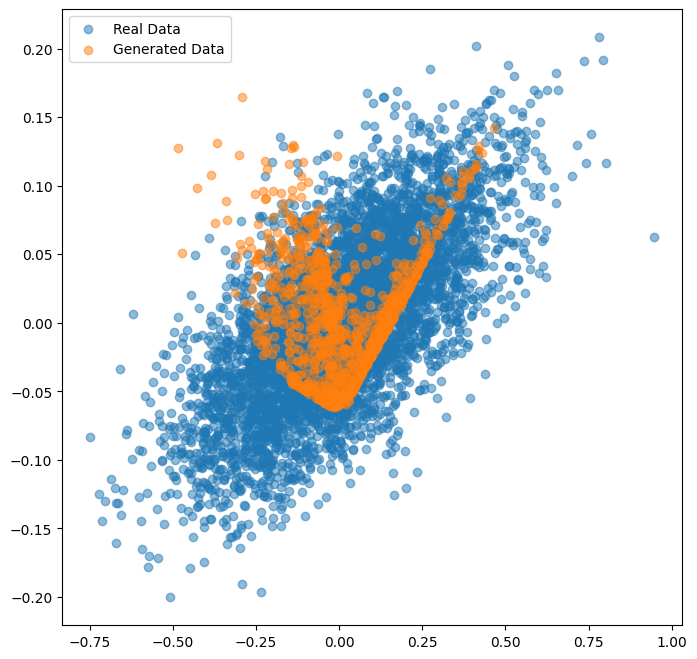

 95%|█████████▍| 9499/10000 [1:14:17<04:07,  2.03it/s]

Epoch 9500/10000, D_loss: -0.0000, G_loss: -0.0008


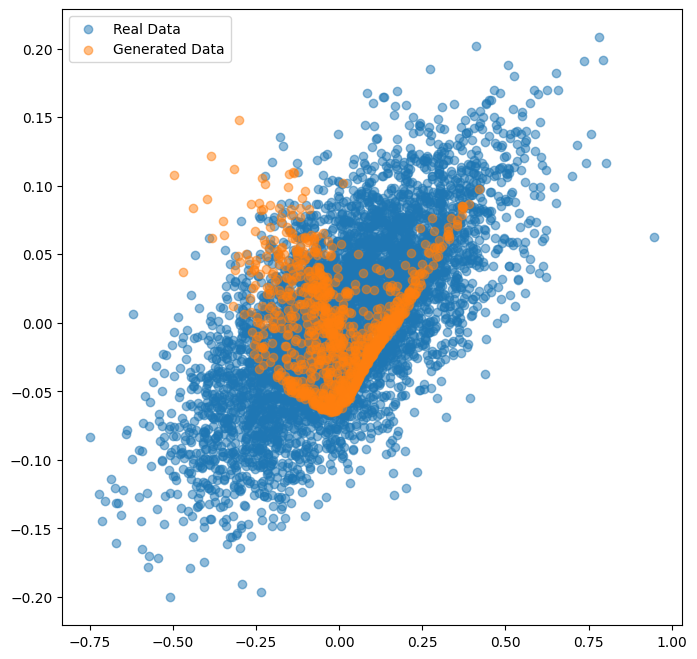

100%|█████████▉| 9999/10000 [1:18:20<00:00,  2.10it/s]

Epoch 10000/10000, D_loss: 0.0000, G_loss: -0.0004


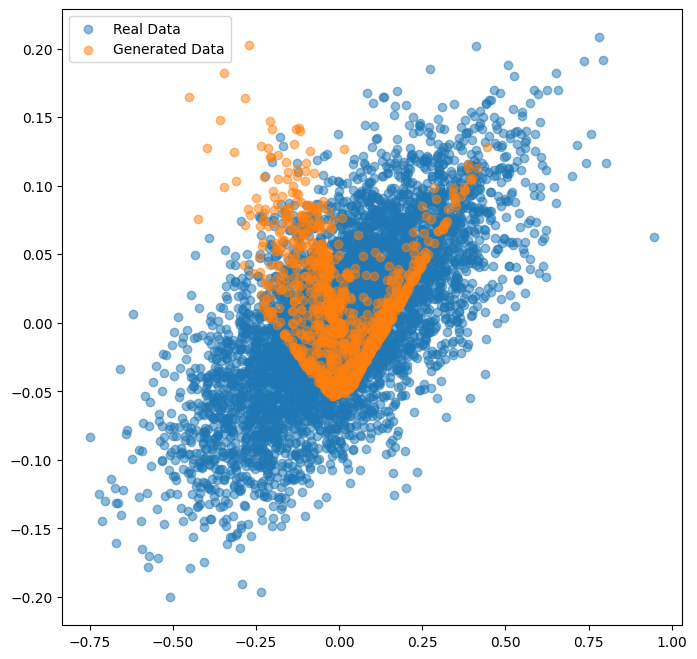

100%|██████████| 10000/10000 [1:18:21<00:00,  2.13it/s]

Done training for 10000 epochs! Elapsed time: 4683.53s


In [17]:
# Loss tracking
d_rl_losses = []
d_fk_losses = []
d_losses = []
g_losses = []
batch_timings = []

# Generate a fixed latent space sample for visualization
fixed_z = torch.randn(1000, latent_dim).to(device)
batches_per_epoch = len(dataloader)

# Training loop
for epoch in tqdm(range(num_epochs)):
    start_time = time.time()
    for i, (real_samples,) in enumerate(dataloader):
        real_samples = real_samples.to(torch.float32).to(device)
        batch_size = real_samples.size(0)

        # Train the Critic
        for _ in range(critic_iterations):
            z = torch.randn(batch_size, latent_dim).to(device)
            fake_samples = generator(z).detach()

            critic_real = critic(real_samples)
            critic_fake = critic(fake_samples)

            loss_c = -(torch.mean(critic_real) - torch.mean(critic_fake))

            optimizer_c.zero_grad()
            loss_c.backward()
            optimizer_c.step()

            # Weight clipping
            for p in critic.parameters():
                p.data.clamp_(-weight_clip, weight_clip)

        # Train the Generator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_samples = generator(z)
        
        loss_g = -torch.mean(critic(fake_samples))

        optimizer_g.zero_grad()
        loss_g.backward()
        optimizer_g.step()

        # Track losses
        d_rl_losses.append(critic_real.mean().item())
        d_fk_losses.append(critic_fake.mean().item())
        d_losses.append(loss_c.item())
        g_losses.append(loss_g.item())

    batch_timings.append(time.time() - start_time)

    # Visualization
    if (epoch + 1) % viz_every == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, D_loss: {loss_c.item():.4f}, G_loss: {loss_g.item():.4f}")

        with torch.no_grad():
            generated_samples = generator(fixed_z).cpu().numpy()

        plt.figure(figsize=(8, 8))
        plt.scatter(pdf_x[:, 0], pdf_x[:, 1], alpha=0.5, label="Real Data")
        plt.scatter(generated_samples[:, 0], generated_samples[:, 1], alpha=0.5, label="Generated Data")
        plt.legend()
        plt.show()

print(f"Done training for {num_epochs} epochs! Elapsed time: {sum(batch_timings):.2f}s")